In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
#-------------------------#

In [2]:
#load the modules
from sys import path as sysPath
sysPath.append('../../src')

from interfacePy.NSC import Evolution 
from interfacePy.Cosmo import Cosmo 

from interfacePy.FT import FT
plt.style.use('../../src/interfacePy/plots.mplstyle')

In [3]:
from misc_dir.path import cosmo_PATH
plasma=Cosmo(cosmo_PATH,0,1e5)

######## You can also do this:
# plasma=Cosmo('../../src/data/eos2020.dat',0,1e5)

In [4]:
Hubble,rhoR = plasma.Hubble, plasma.rhoR

In [5]:
# Evolution instance
BE=Evolution()

In [6]:
TEND=1e-2
c=3
Ti=1e7
ratio=1e-2

umax=500
TSTOP=1e-4

In [7]:
# options for the solver
# These variables are optional. Yoou can use the NSC class without them.
initial_step_size=1e-2; #initial step the solver takes. 
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
maximum_step_size=1e-2; #This limits the sepsize to a lower limit.
absolute_tolerance=1e-11; #absolute tolerance of the RK solver
relative_tolerance=1e-11; #relative tolerance of the RK solver
beta=0.9; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.2;
fac_min=0.8;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.

In [8]:
# solve the Boltzmann equations (this only TE1, TE2, TD1, and TD2)
BE.solveNSC(TEND,c,Ti,ratio,TSTOP,umax,plasma,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)

(True, 0.04943418502807617)

In [9]:
BE.TE1,BE.TE2,BE.TD1,BE.TD2

(99518.18307848423,
 0.006244660276447481,
 0.2603474542230043,
 0.003625274510891539)

In [10]:
BE.getPoints()#this gives you all the points of integration
BE.getErrors()#this gives you the local errors

<IPython.core.display.Javascript object>


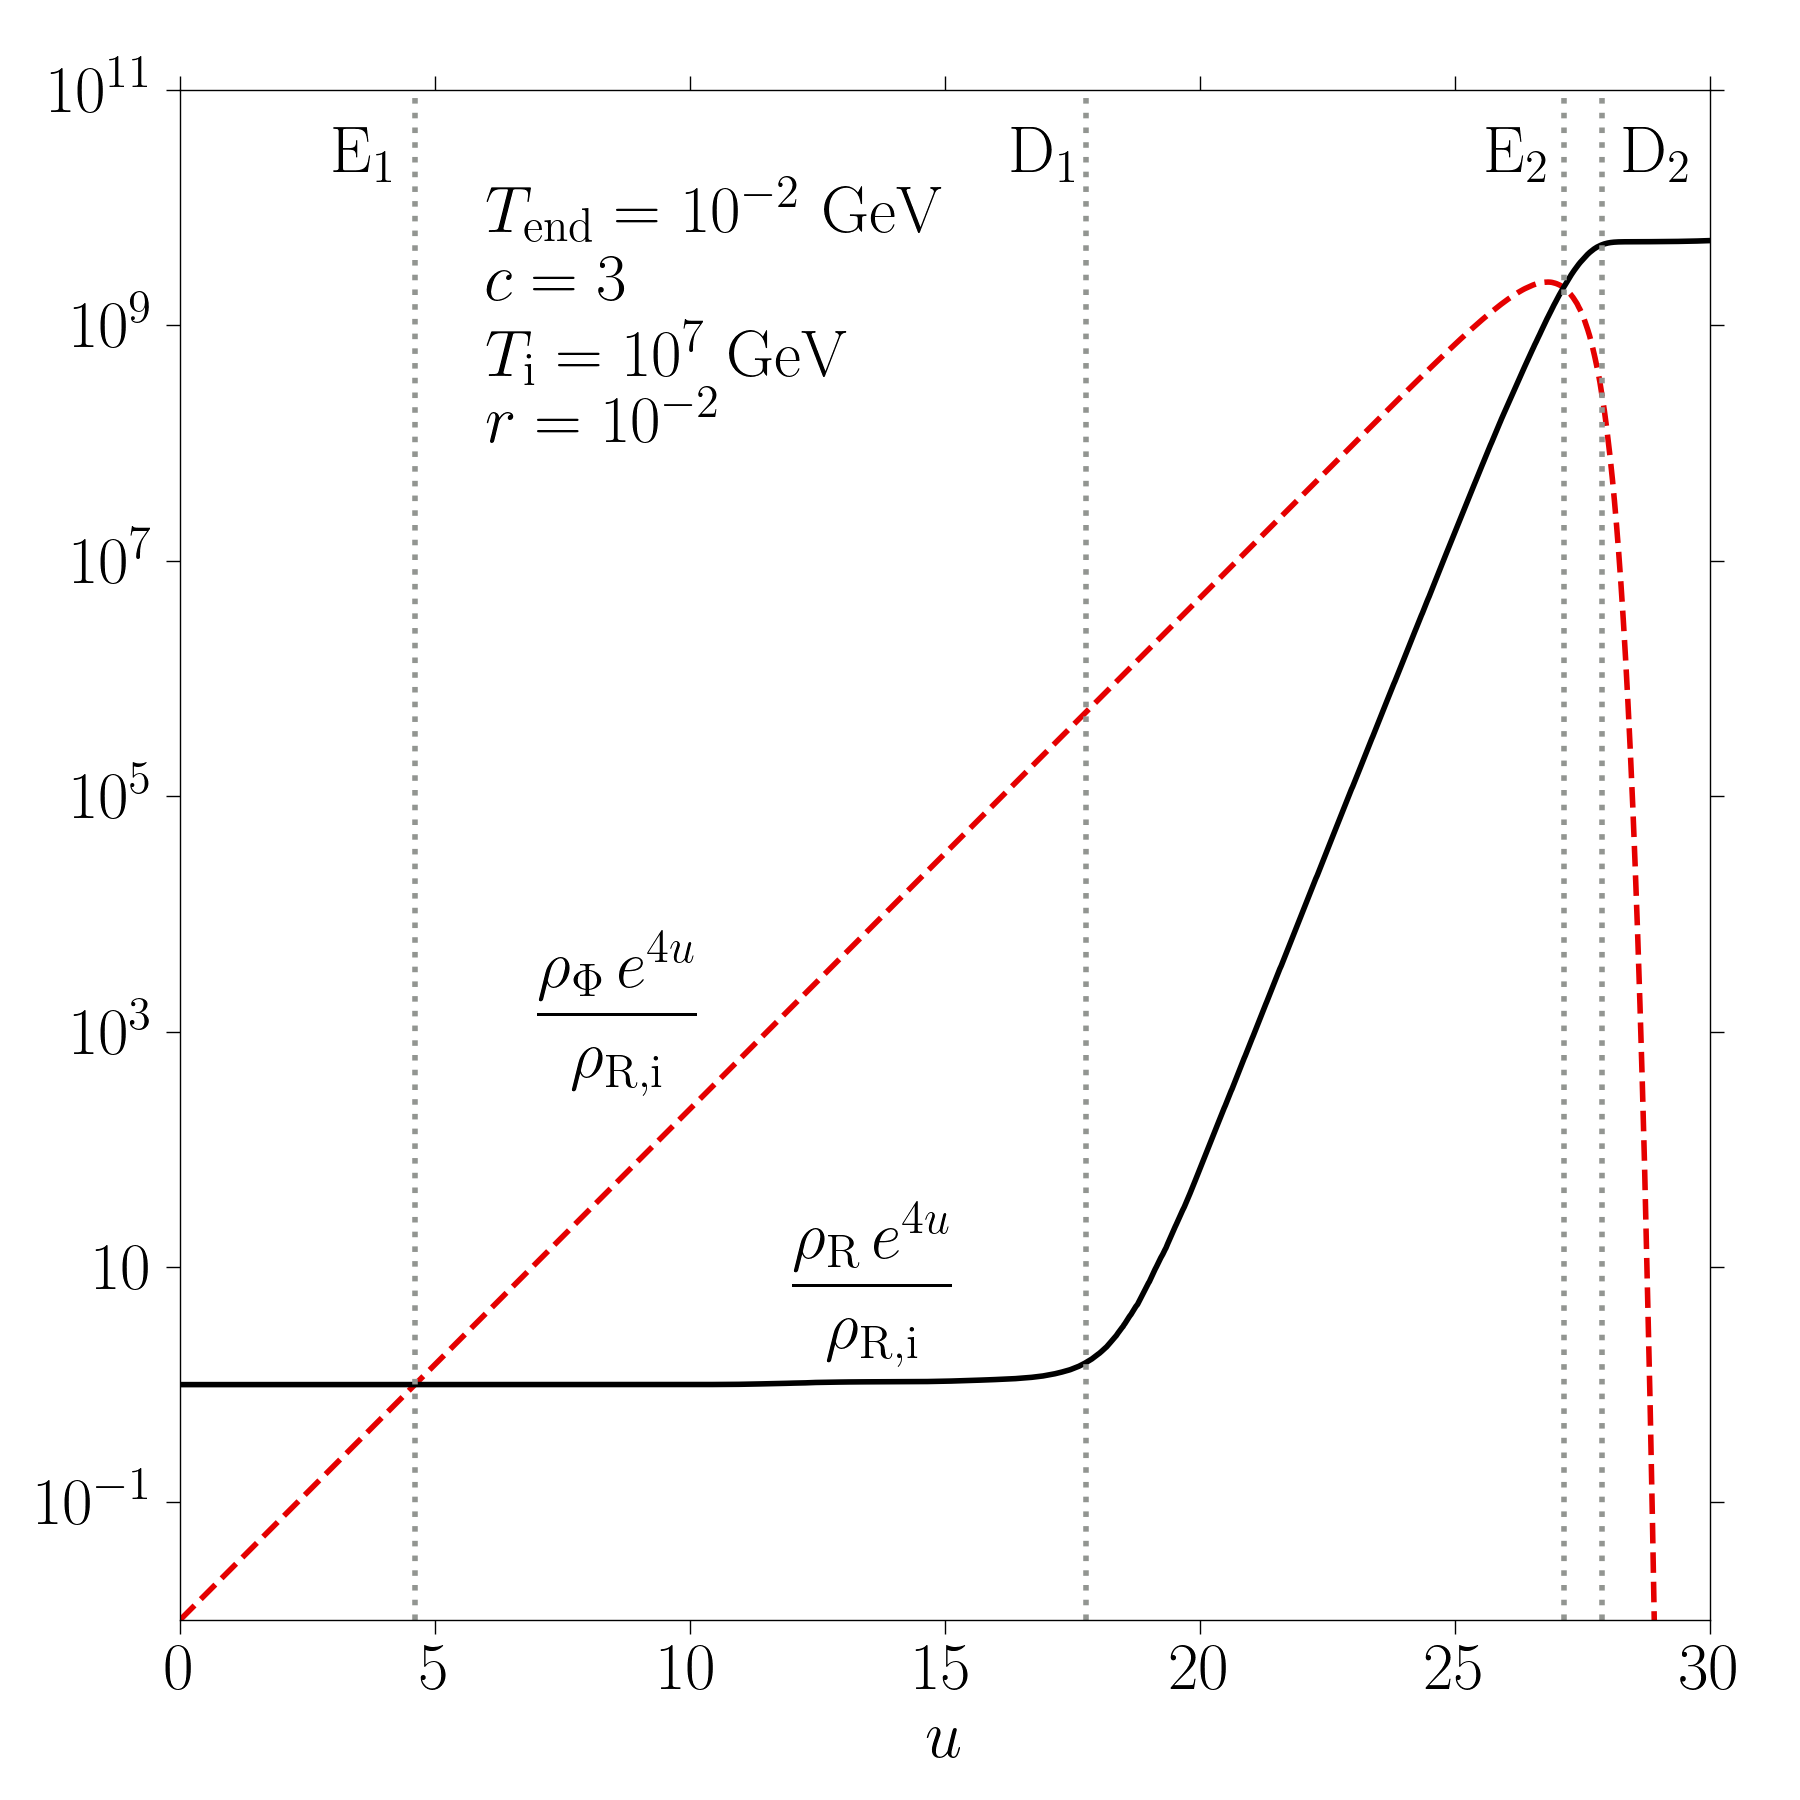

In [11]:
if True:
    fig=plt.figure(figsize=(9,9))
    fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.95, right=0.95,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=np.exp(BE.u)
    
    Y=BE.rhoPhi/rhoR(BE.T[0])*X**4
    sub.plot(np.log(X),Y,linestyle='--',linewidth=2,alpha=1,c='xkcd:red',label=r'$\rho_{\Phi}$')

    Y=[rhoR(T)/rhoR(BE.T[0])*X[i]**4 for i,T in enumerate(BE.T)]
    sub.plot(np.log(X),Y,linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\rho_{R}$')
    
    sub.axvline(BE.uE1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uE2,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD2,c='xkcd:gray',linestyle=':',linewidth=2)

    
    sub.set_xlabel(r'$u$')
    sub.xaxis.set_label_coords(0.5, -0.06) 
#     sub.set_ylabel(r'$\rho \, e^{4\,u} / \rho_{R,i}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    #set major ticks
    _M_xticks=[ i for i in range(0,60,5) ]
    _M_yticks=[ 10.**i for i in range(-1,25,2) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    
    
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0,xmax=30,ymin=1e-2,ymax=1e11,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    sub.text(x=12,y=5, s=r'$\dfrac{\rho_{\rm R} \, e^{4u}}{\rho_{\rm R,i}}$')
    sub.text(x=7,y=1e3, s=r'$\dfrac{\rho_{\Phi} \, e^{4u}}{\rho_{\rm R,i}}$')
    
    sub.text(x=6,y=1e8,
         s=r'$T_{\rm end}=10^{-2}~{\rm GeV}$'+'\n'+
             r'$c=3$'+'\n'+
             r'$T_{\rm i} =10^{7}~{\rm GeV} $'+'\n'+
             r'$r=10^{-2}$'         
        )
    
        
    sub.text(x=3,y=2e10,s=r'$\rm E_1$')
    sub.text(x=25.6,y=2e10 ,s=r'$\rm E_2$')
    sub.text(x=16.3,y=2e10 ,s=r' $\rm D_1$ ')
    sub.text(x=28.3,y=2e10,s=r'$\rm D_2$')

    fig.savefig('EMD.pdf',bbox_inches='tight')

    fig.show()

/tmp/ipykernel_19493/3366767612.py:8: RuntimeWarning: invalid value encountered in true_divide
  Y=BE.drhoPhi/BE.rhoPhi


<IPython.core.display.Javascript object>


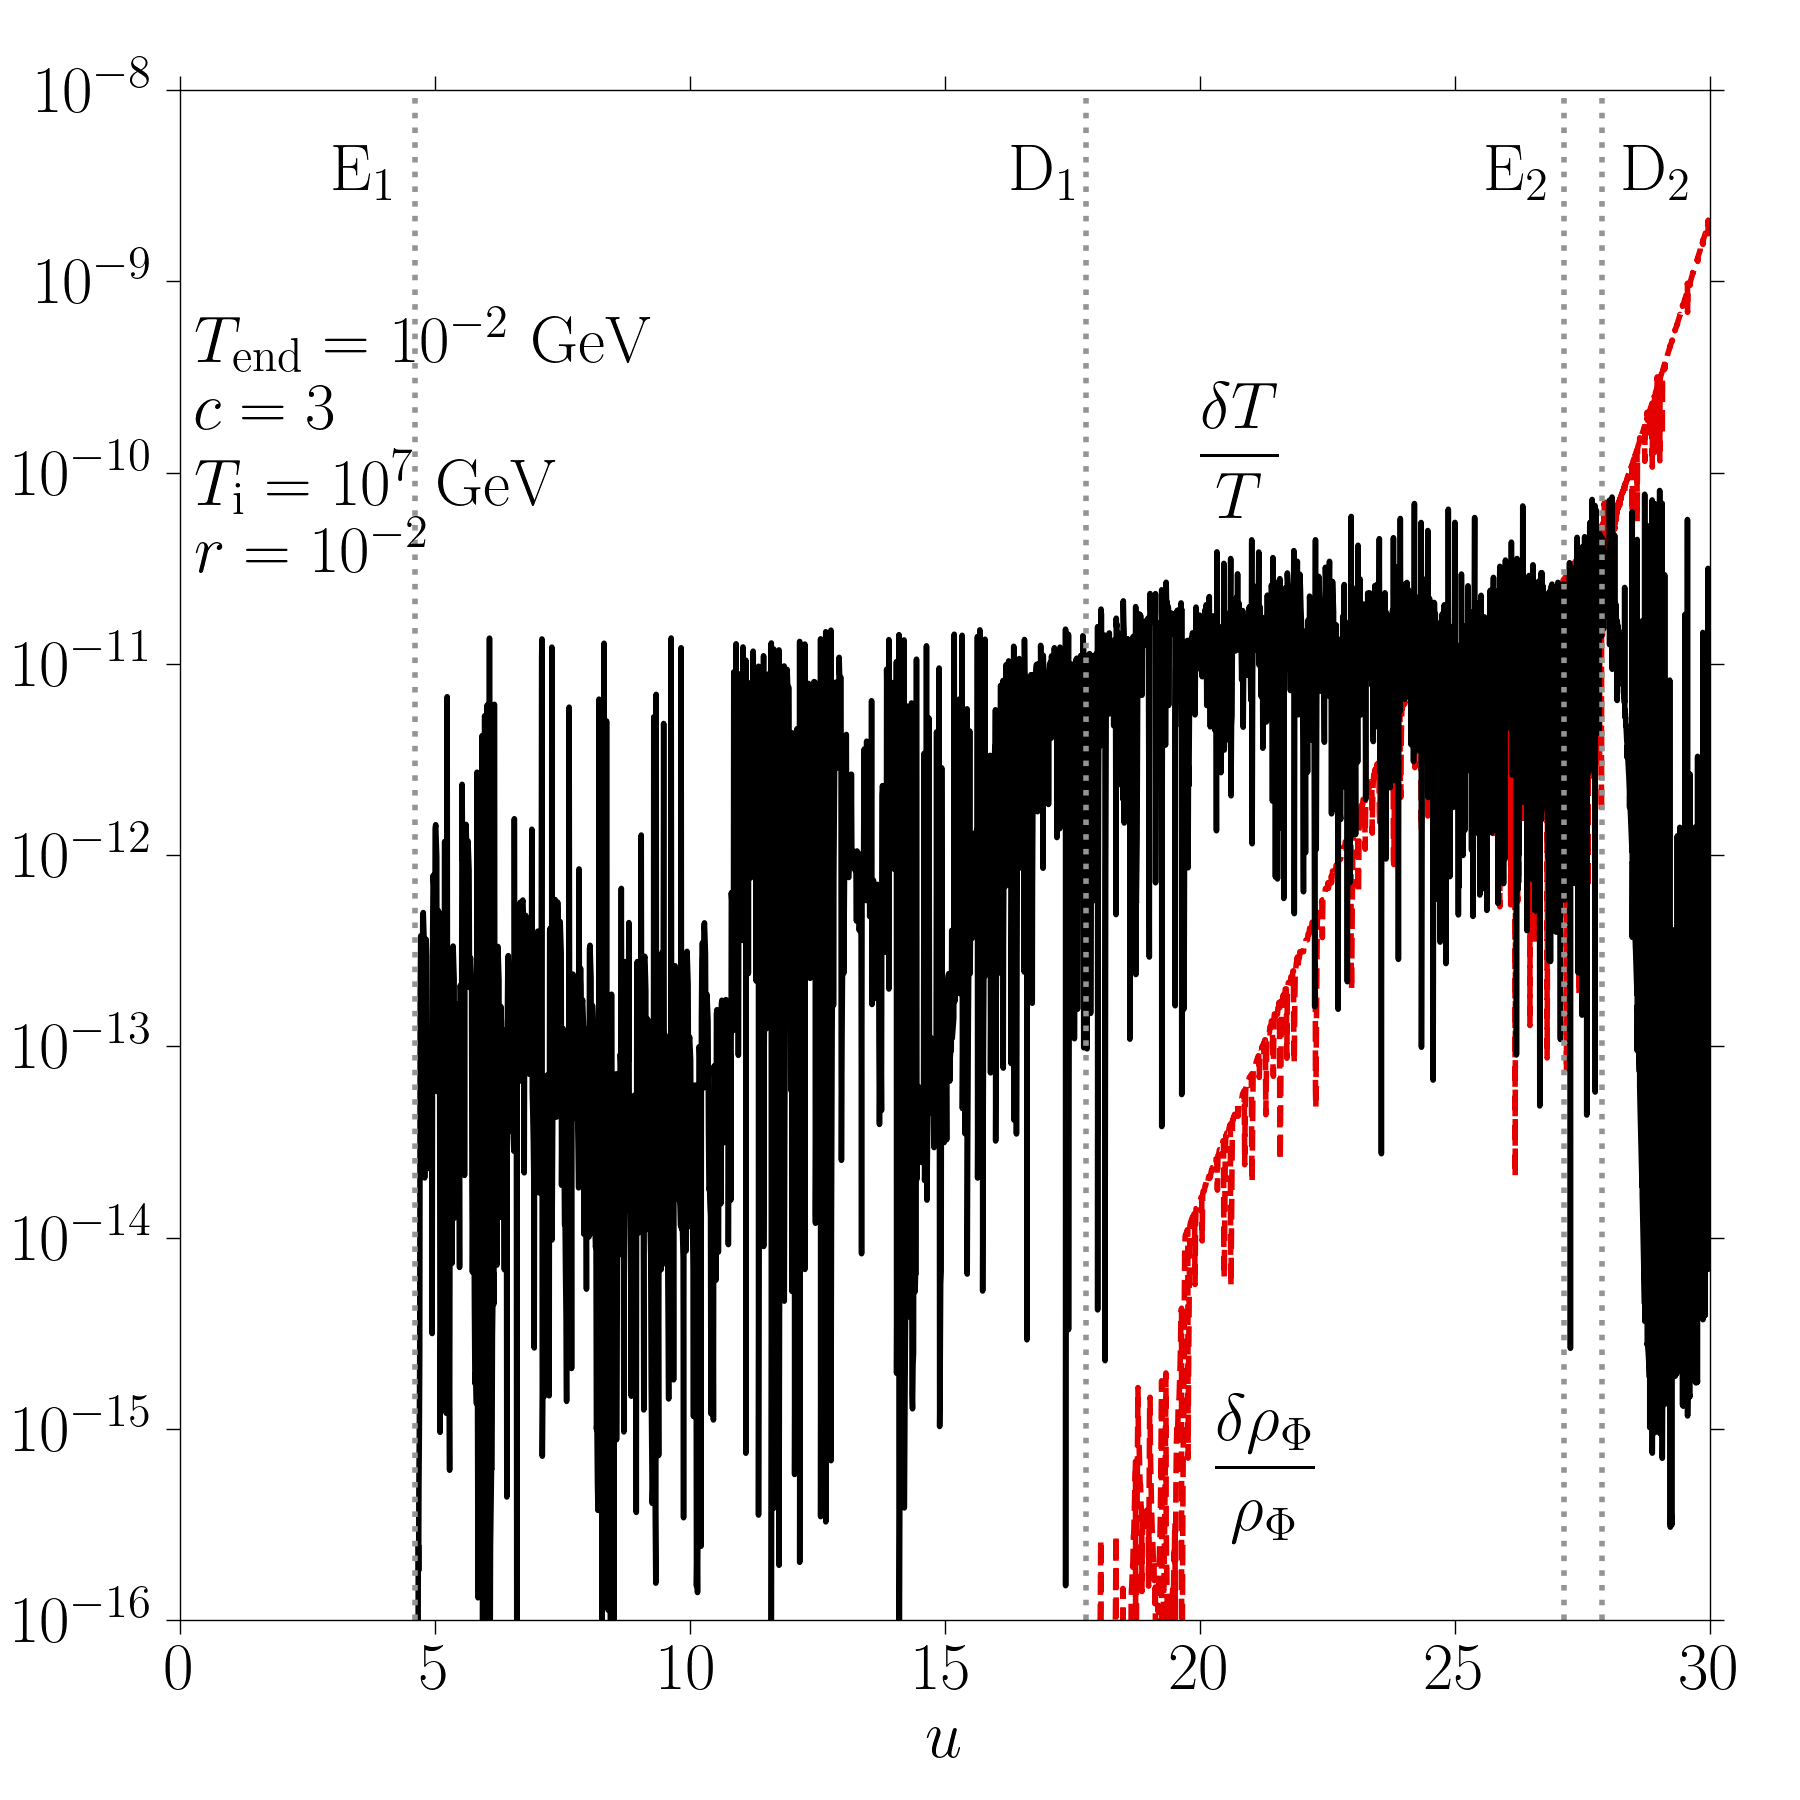

In [12]:
if True:
    fig=plt.figure(figsize=(9,9))
    fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.95, right=0.95,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=BE.u
    
    Y=BE.drhoPhi/BE.rhoPhi
    sub.plot(X,Y,linestyle='--',linewidth=2,alpha=1,c='xkcd:red',label=r'$\rho_{\Phi}$')

    Y=BE.dT/BE.T
    sub.plot(X,Y,linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\rho_{R}$')
    
    sub.axvline(BE.uE1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uE2,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD2,c='xkcd:gray',linestyle=':',linewidth=2)

    
    sub.set_xlabel(r'$u$')
    sub.xaxis.set_label_coords(0.5, -0.06) 
#     sub.set_ylabel(r'$\rho \, e^{4\,u} / \rho_{R,i}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
#     #set major ticks
    _M_xticks=[ i for i in range(0,60,5) ]
    _M_yticks=[ 10.**i for i in range(-16,-4) ]

#     #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    
    
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0,xmax=30,ymin=1e-16,ymax=1e-8,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    sub.text(x=20.,y=1e-10, s=r'$\dfrac{\delta T}{T}$')
    sub.text(x=20.3,y=5e-16, s=r'$\dfrac{\delta \rho_{\Phi}}{\rho_{\Phi}}$')
    
    sub.text(x=0.3,y=3e-11,
         s=r'$T_{\rm end}=10^{-2}~{\rm GeV}$'+'\n'+
             r'$c=3$'+'\n'+
             r'$T_{\rm i} =10^{7}~{\rm GeV} $'+'\n'+
             r'$r=10^{-2}$'         
        )
    
        
    sub.text(x=3,y=3e-9,s=r'$\rm E_1$')
    sub.text(x=25.6,y=3e-9 ,s=r'$\rm E_2$')
    sub.text(x=16.3,y=3e-9 ,s=r' $\rm D_1$ ')
    sub.text(x=28.3,y=3e-9,s=r'$\rm D_2$')

    fig.savefig('EMD_err.pdf',bbox_inches='tight')

    fig.show()

<IPython.core.display.Javascript object>


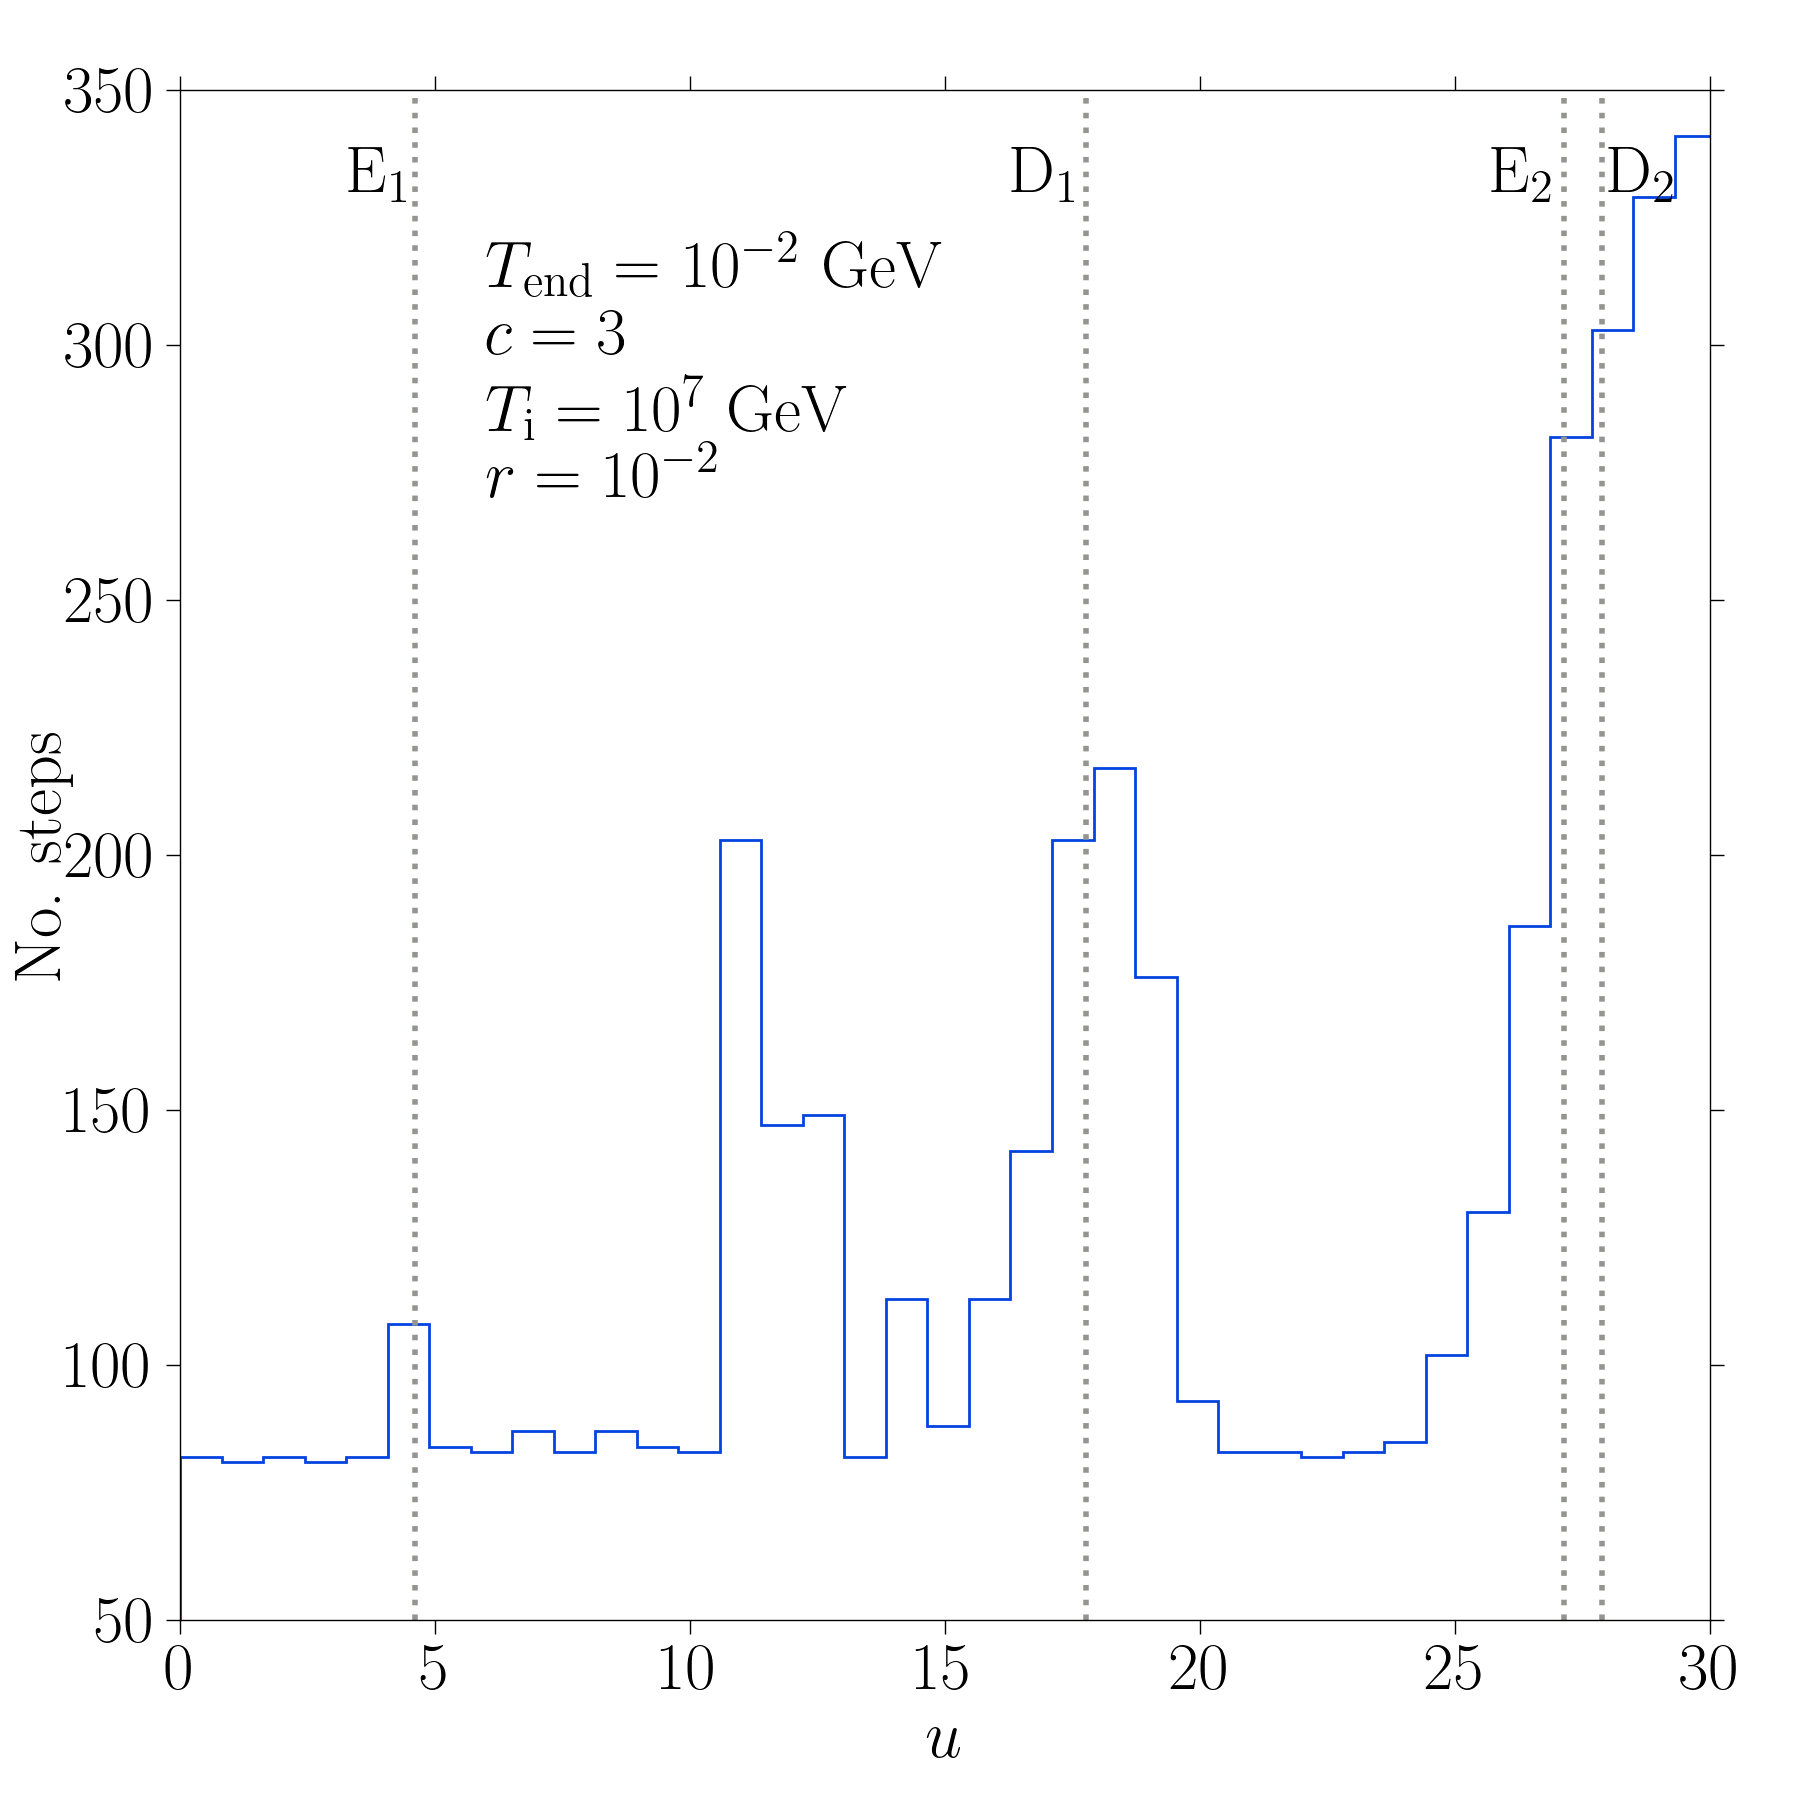

In [13]:
if True:
    fig=plt.figure(figsize=(9,9))
    fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.95, right=0.95,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)

    sub.hist(BE.u,bins=np.linspace(BE.u[0],BE.u[-1],40),color='xkcd:blue',histtype='step')
    
    sub.axvline(BE.uE1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uE2,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD2,c='xkcd:gray',linestyle=':',linewidth=2)
    
    
    sub.set_xlabel(r'$u$')
    sub.xaxis.set_label_coords(0.5, -0.06) 
    sub.set_ylabel(r'No. steps')
    sub.yaxis.set_label_coords(-0.07,0.5) 

#     #set major ticks
    _M_xticks=[ i for i in range(0,60,5) ]
    _M_yticks=[ i for i in range(0,500,50) ]

#     #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    
    
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0,xmax=30,ymin=50,ymax=350,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    sub.text(x=6,y=270,
         s=r'$T_{\rm end}=10^{-2}~{\rm GeV}$'+'\n'+
             r'$c=3$'+'\n'+
             r'$T_{\rm i} =10^{7}~{\rm GeV} $'+'\n'+
             r'$r=10^{-2}$'         
        )
    
        
    sub.text(x=3.3,y=330,s=r'$\rm E_1$')
    sub.text(x=25.7,y=330 ,s=r'$\rm E_2$')
    sub.text(x=16.3,y=330 ,s=r' $\rm D_1$ ')
    sub.text(x=28,y=330,s=r'$\rm D_2$')
    
    fig.savefig('EMD_hist.pdf',bbox_inches='tight')

    fig.show()

In [14]:
TEND=1e4
c=6
Ti=1e7
ratio=1e8

umax=500
TSTOP=1e3

# solve the Boltzmann equations (this only TE1, TE2, TD1, and TD2)
BE.solveNSC(TEND,c,Ti,ratio,TSTOP,umax,plasma,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)

(True, 0.016648292541503906)

In [15]:
BE.getPoints()#this gives you all the points of integration
BE.getErrors()#this gives you the local errors

<IPython.core.display.Javascript object>


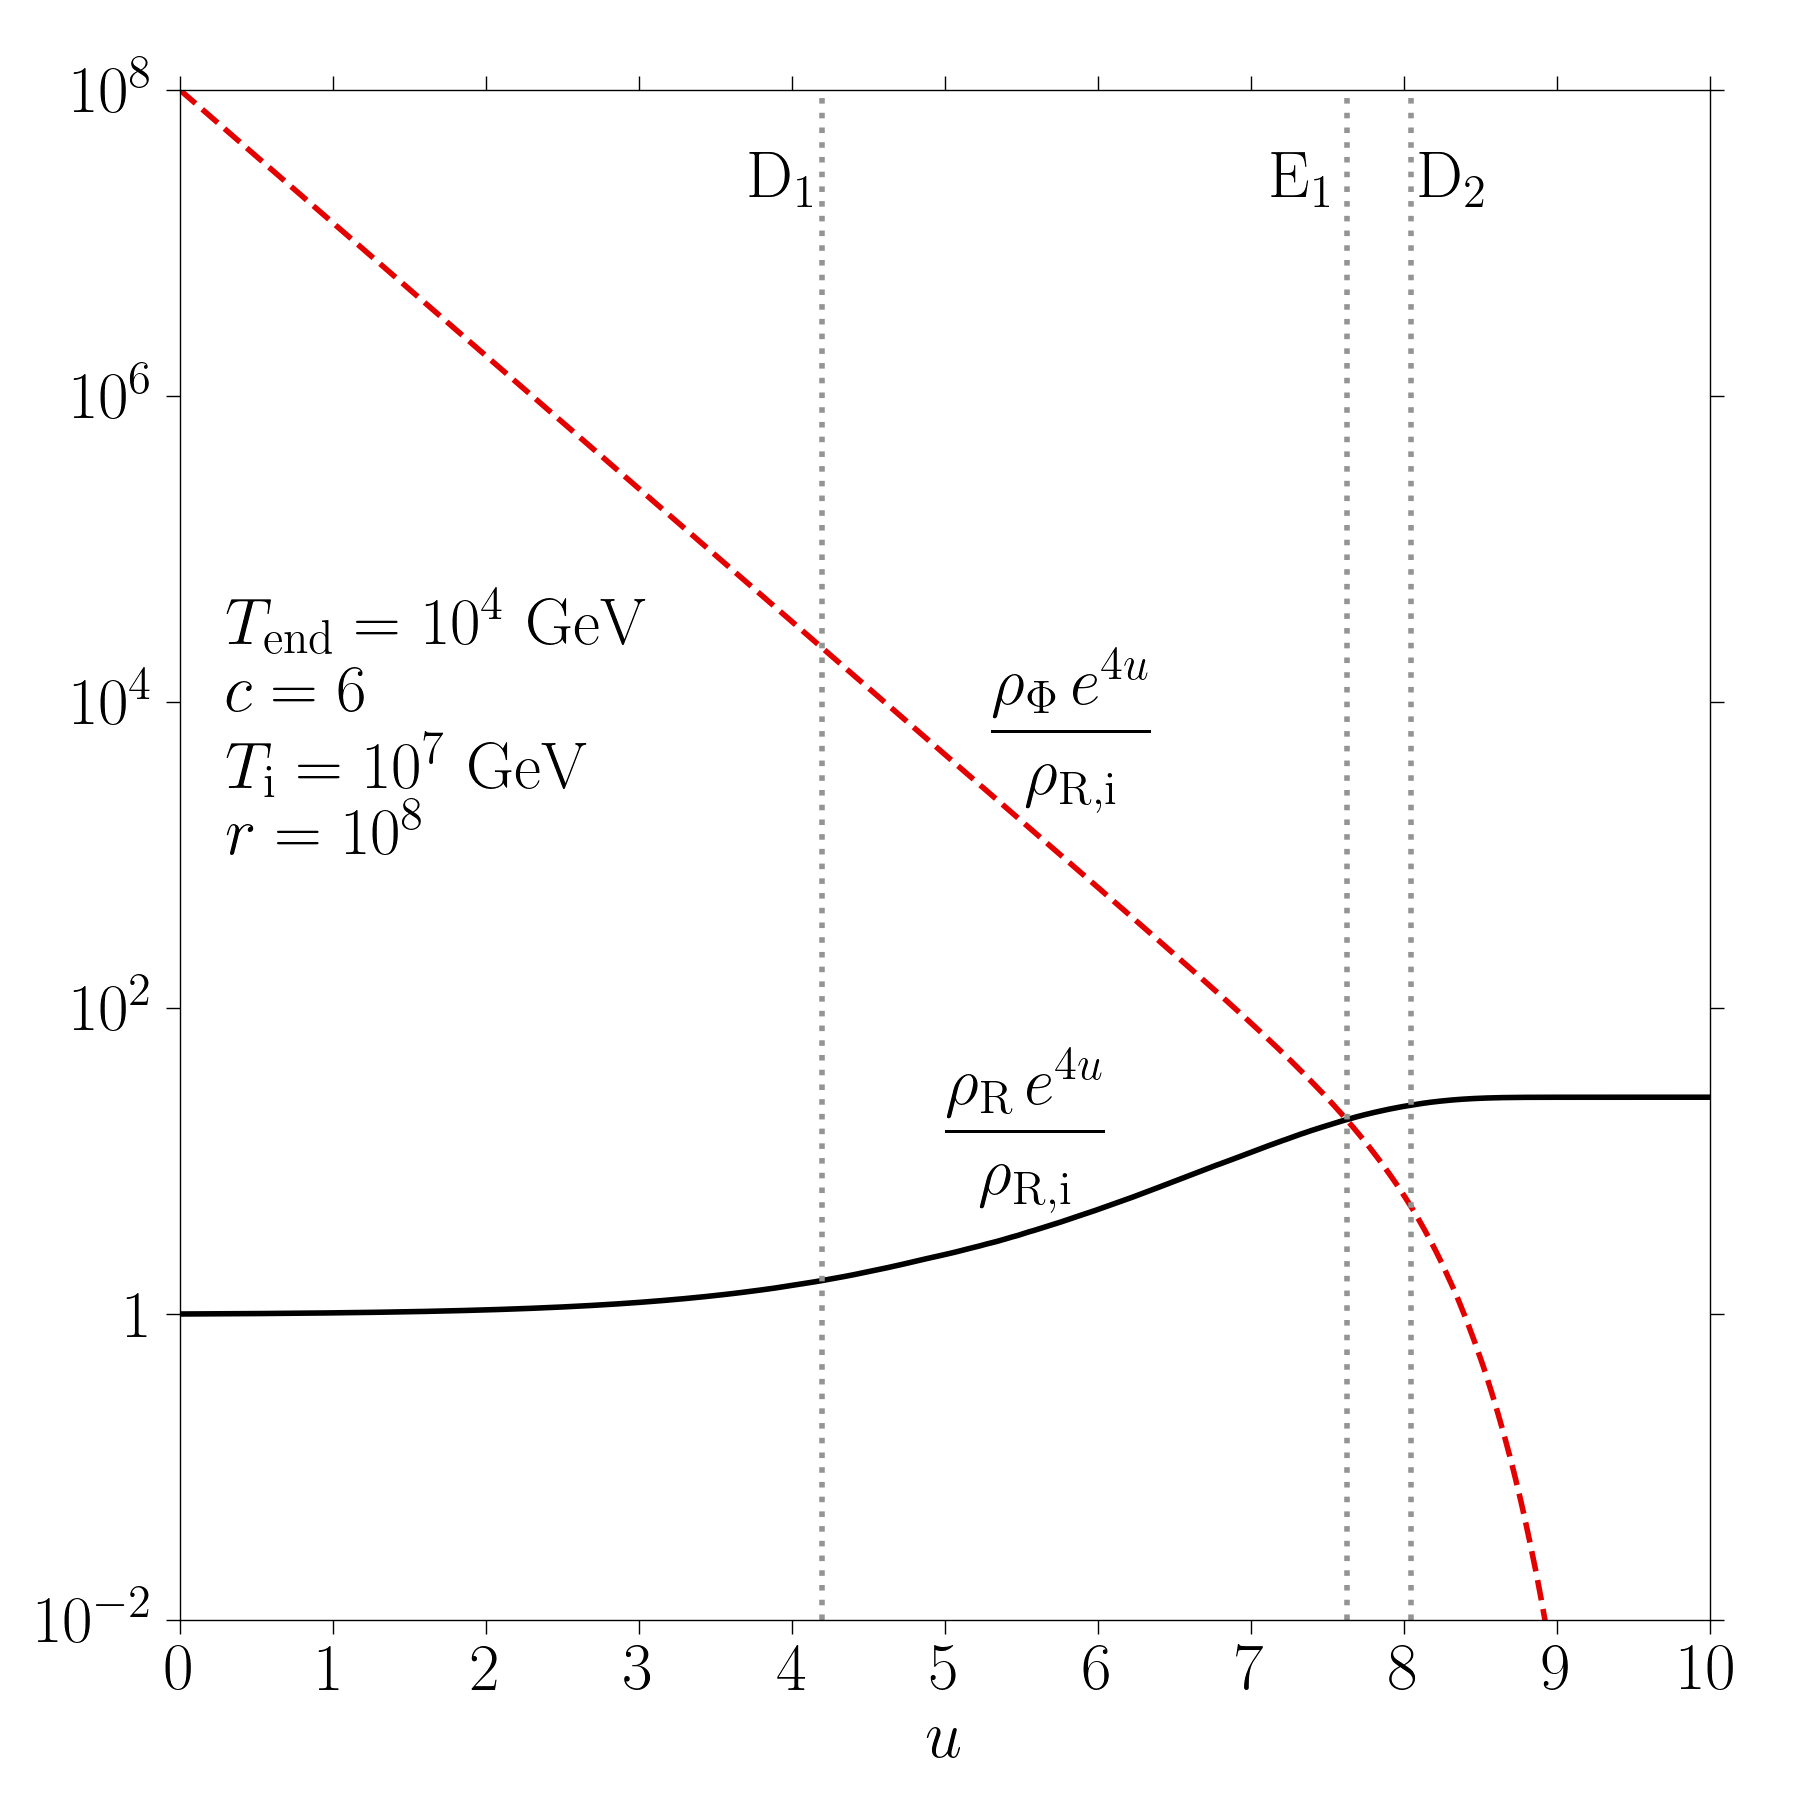

In [16]:
if True:
    fig=plt.figure(figsize=(9,9))
    fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.95, right=0.95,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=np.exp(BE.u)
    
    Y=BE.rhoPhi/rhoR(BE.T[0])*X**4
    sub.plot(np.log(X),Y,linestyle='--',linewidth=2,alpha=1,c='xkcd:red',label=r'$\rho_{\Phi}$')

    Y=[rhoR(T)/rhoR(BE.T[0])*X[i]**4 for i,T in enumerate(BE.T)]
    sub.plot(np.log(X),Y,linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\rho_{R}$')
    
    sub.axvline(BE.uE1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD2,c='xkcd:gray',linestyle=':',linewidth=2)

#     sub.set_yscale('log')
#     sub.set_ylim(1/ratio,ratio)
    
    sub.set_xlabel(r'$u$')
    sub.xaxis.set_label_coords(0.5, -0.06) 
#     sub.set_ylabel(r'$\rho \, e^{4\,u} / \rho_{R,i}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    #set major ticks
    _M_xticks=[ i for i in range(0,11) ]
    _M_yticks=[ 10.**i for i in range(-4,10,2) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    
    
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0,xmax=10,ymin=1e-2,ymax=1e8,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    sub.text(x=5,y=1.2e1, s=r'$\dfrac{\rho_{\rm R} \, e^{4u}}{\rho_{\rm R,i}}$')
    sub.text(x=5.3,y=5e3, s=r'$\dfrac{\rho_{\Phi} \, e^{4u}}{\rho_{\rm R,i}}$')
    
    sub.text(x=0.3,y=1e3,
         s=r'$T_{\rm end}=10^{4}~{\rm GeV}$'+'\n'+
             r'$c=6$'+'\n'+
             r'$T_{\rm i} =10^{7}~{\rm GeV} $'+'\n'+
             r'$r=10^8$'         
        )
    
        
    sub.text(x=3.72,y=2e7,s=r'$\rm D_1$')
    sub.text(x=7.13,y=2e7 ,s=r' $\rm E_1$ ')
    sub.text(x=8.1,y=2e7,s=r'$\rm D_2$')

    fig.savefig('EKD.pdf',bbox_inches='tight')

    fig.show()

<IPython.core.display.Javascript object>


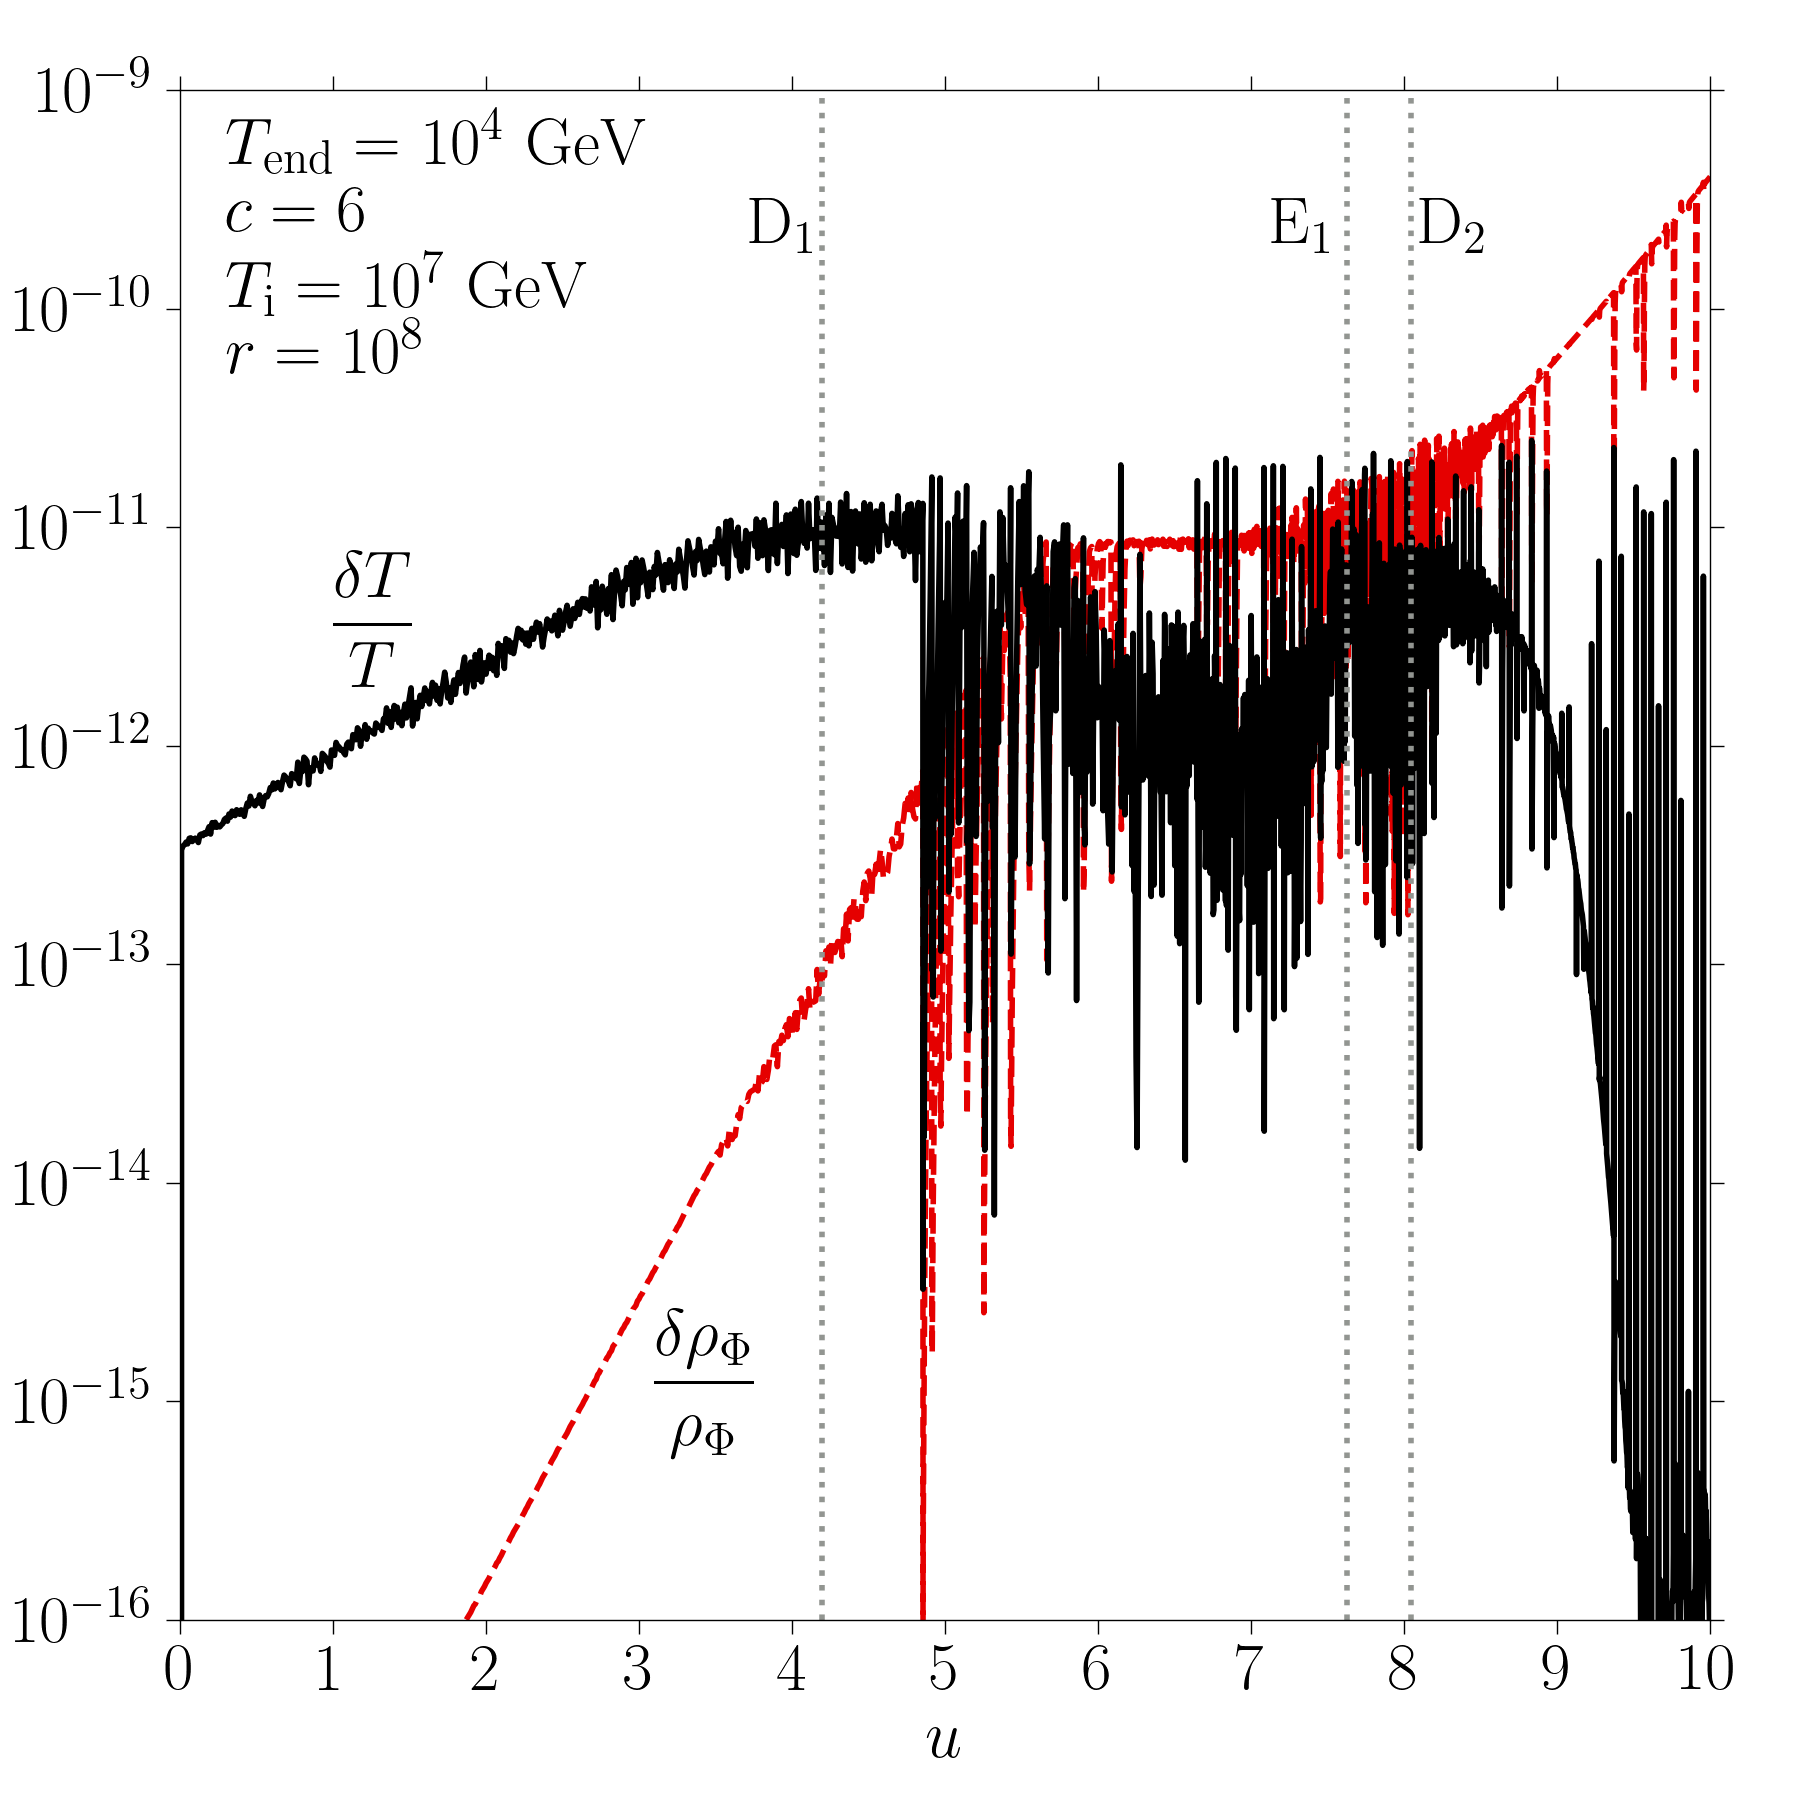

In [17]:
if True:
    fig=plt.figure(figsize=(9,9))
    fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.95, right=0.95,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=BE.u
    
    Y=BE.drhoPhi/BE.rhoPhi
    sub.plot(X,Y,linestyle='--',linewidth=2,alpha=1,c='xkcd:red',label=r'$\rho_{\Phi}$')

    Y=BE.dT/BE.T
    sub.plot(X,Y,linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\rho_{R}$')
    
    sub.axvline(BE.uE1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD2,c='xkcd:gray',linestyle=':',linewidth=2)

    
    sub.set_xlabel(r'$u$')
    sub.xaxis.set_label_coords(0.5, -0.06) 
#     sub.set_ylabel(r'$\rho \, e^{4\,u} / \rho_{R,i}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
#     #set major ticks
    _M_xticks=[ i for i in range(0,11,1) ]
    _M_yticks=[ 10.**i for i in range(-16,-4) ]

#     #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    
    
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0,xmax=10,ymin=1e-16,ymax=1e-9,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    sub.text(x=1.,y=3e-12, s=r'$\dfrac{\delta T}{T}$')
    sub.text(x=3.1,y=1e-15, s=r'$\dfrac{\delta \rho_{\Phi}}{\rho_{\Phi}}$')
    
    sub.text(x=0.3,y=5e-11,
         s=r'$T_{\rm end}=10^{4}~{\rm GeV}$'+'\n'+
             r'$c=6$'+'\n'+
             r'$T_{\rm i} =10^{7}~{\rm GeV} $'+'\n'+
             r'$r=10^8$'         
        )

    sub.text(x=3.72,y=2e-10,s=r'$\rm D_1$')
    sub.text(x=7.13,y=2e-10 ,s=r' $\rm E_1$ ')
    sub.text(x=8.1,y=2e-10,s=r'$\rm D_2$')

    fig.savefig('EKD_err.pdf',bbox_inches='tight')

    fig.show()

<IPython.core.display.Javascript object>


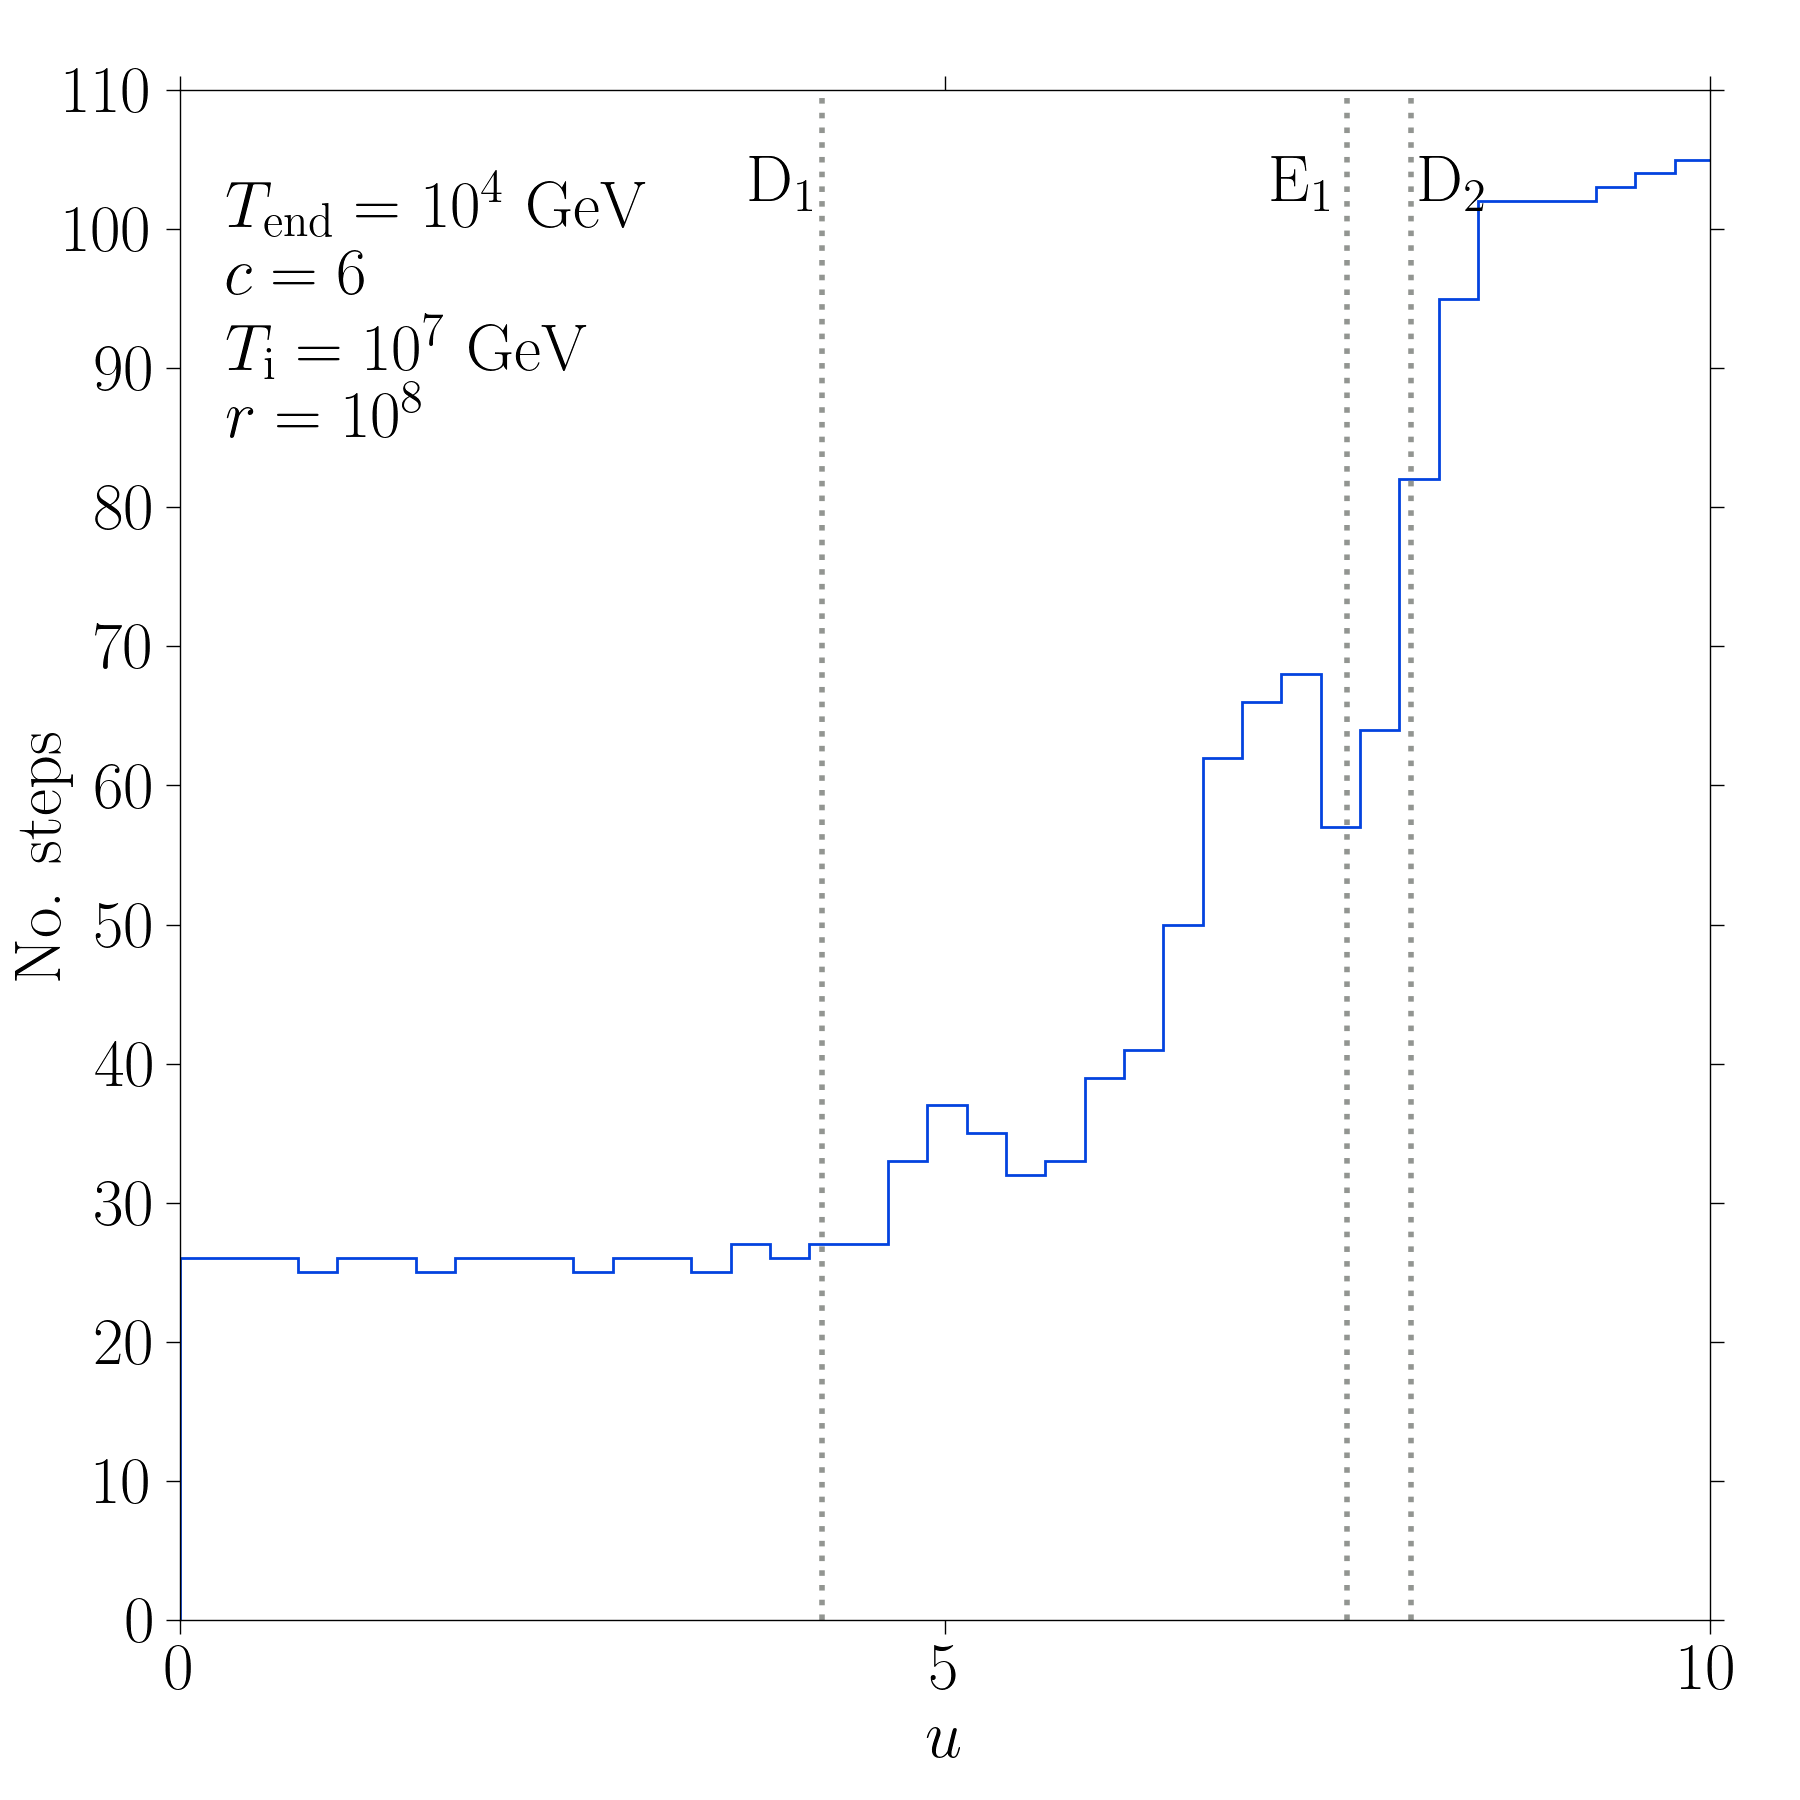

In [18]:
if True:
    fig=plt.figure(figsize=(9,9))
    fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.95, right=0.95,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)

    sub.hist(BE.u,bins=np.linspace(BE.u[0],BE.u[-1],40),color='xkcd:blue',histtype='step')
    
    sub.axvline(BE.uE1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.uD2,c='xkcd:gray',linestyle=':',linewidth=2)
    
    
    sub.set_xlabel(r'$u$')
    sub.xaxis.set_label_coords(0.5, -0.06) 
    sub.set_ylabel(r'No. steps')
    sub.yaxis.set_label_coords(-0.07,0.5) 

#     #set major ticks
    _M_xticks=[ i for i in range(0,60,5) ]
    _M_yticks=[ i for i in range(0,150,10) ]

#     #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    
    
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0,xmax=10,ymin=0,ymax=110,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    sub.text(x=0.3,y=85,
         s=r'$T_{\rm end}=10^{4}~{\rm GeV}$'+'\n'+
             r'$c=6$'+'\n'+
             r'$T_{\rm i} =10^{7}~{\rm GeV} $'+'\n'+
             r'$r=10^8$'         
        )
    
        
    sub.text(x=3.72,y=102,s=r'$\rm D_1$')
    sub.text(x=7.13,y=102,s=r' $\rm E_1$ ')
    sub.text(x=8.1,y=102,s=r'$\rm D_2$')
    
    fig.savefig('EKD_hist.pdf',bbox_inches='tight')

    fig.show()

In [19]:
del BE, plasma